In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

# Um problema em T estados


In [230]:
T = 10

In [231]:
Buildings  = cvx.Variable(T)
Gatherers  = cvx.Variable(T)
Builders   = cvx.Variable(T)
Army       = cvx.Variable(T)
Resources  = cvx.Variable(T)

In [232]:
custo_building      = 2 # buildings costs                         recurso/casinha
custo_units         = 1 # units costs                             recurso/pessoinha
supply_building     = 3 # supply per structure                    caminha/casinha
army_building       = 2 # army trained per house                   pessoinhas/casinha
building_builder    = 1 # buildings constructed per builder       casinhas/pessoinha1
production_gatherer = 2 # resources gathered per gatherer          recursos/pessoinha2

In [233]:
custo_building      = 2 # buildings costs                         recurso/casinha
custo_units         = 3 # units costs                             recurso/pessoinha
supply_building     = 2 # supply per structure                    caminha/casinha
army_building       = 1 # army trained per house                   pessoinhas/casinha
building_builder    = 1 # buildings constructed per builder       casinhas/pessoinha1
production_gatherer = 1 # resources gathered per gatherer          recursos/pessoinha2

In [234]:
F_Obj = cvx.Maximize(Army[-1])

In [235]:
B = cvx.Variable(T-1)
G = cvx.Variable(T-1)
Br = cvx.Variable(T-1)

In [236]:
b0 = cvx.Parameter()
g0 = cvx.Parameter()
br0 = cvx.Parameter()
r0 = cvx.Parameter()

In [237]:
b0.value  = 1       # starting buildings
g0.value  = 1       # starting gatherers
br0.value = 0       # starting builders
r0.value  = 1       # starting resources

In [238]:
Constraints = [Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == g0 + br0,
              Resources[0] == r0,
              B >= 0,
              G >= 0,
              Br>= 0]

for i in range(T-1):
    
    Constraints.append(B[i]  == Buildings[i+1] - Buildings[i])
    Constraints.append(Br[i] == Builders[i+1]  - Builders[i])
    Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])
    
    Constraints.append(B[i] <= building_builder*Builders[i])
    Constraints.append(Br[i] + G[i] <= army_building*Buildings[i])
    
    Constraints.append(Army[i+1]           == Builders[i+1] + Gatherers[i+1])
    Constraints.append(Army[i+1]           <= Buildings[i+1]*supply_building)
    
    Constraints.append(Resources[i+1] == Resources[i]
                       + production_gatherer*Gatherers[i]
                       - custo_building*B[i] - custo_units*(G[i] + Br[i]))    
#    Constraints.append(Resources[i+1] >= 0)
    Constraints.append(Resources[i]   >= custo_building*B[i] + custo_units*(G[i] + Br[i]))


In [239]:
problem = cvx.Problem(F_Obj, Constraints)

In [240]:
%time problem.solve(solver = 'ECOS') #SCS #ECOS

Wall time: 102 ms


5.956440843933209

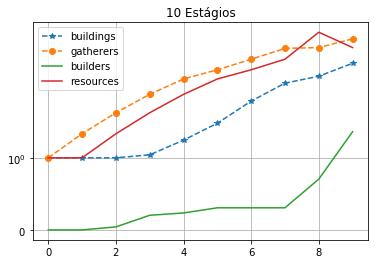

In [241]:
plt.plot(Buildings.value,'--*', label='buildings')

plt.plot(Gatherers.value,'o--', label='gatherers')
plt.plot(Builders.value, label='builders')
#plt.plot(Army.value, label='')
plt.plot(Resources.value, label='resources')
#plt.plot(Max_supply.value, label='')
#plt.plot(B.value, label='')
#plt.plot(G.value, label='')

plt.yscale('symlog')
plt.grid()
plt.legend()
plt.title(str(T) + ' Estágios')
plt.savefig("figure.png", bbox_inches = 'tight',
    pad_inches = 0)

# Gráficos bonitos


In [332]:
custo_building      = 2 # buildings costs                         recurso/casinha
custo_units         = 3 # units costs                             recurso/pessoinha
supply_building     = 1 # supply per structure                    caminha/casinha
army_building       = 1 # army trained per house                   pessoinhas/casinha
building_builder    = 0.5 # buildings constructed per builder       casinhas/pessoinha1
production_gatherer = 0.5 # resources gathered per gatherer          recursos/pessoinha2

# Integer Problem

In [274]:
T = 10

In [275]:
Buildings  = cvx.Variable(T,integer=True)
Gatherers  = cvx.Variable(T,integer=True)
Builders   = cvx.Variable(T,integer=True)
Army       = cvx.Variable(T,integer=True)
Resources  = cvx.Variable(T,integer=True)

In [276]:
B = cvx.Variable(T-1,integer=True)
G = cvx.Variable(T-1,integer=True)
Br = cvx.Variable(T-1,integer=True)

In [277]:
custo_building      = 2 # buildings costs                         recurso/casinha
custo_units         = 1 # units costs                             recurso/pessoinha
supply_building     = 3 # supply per structure                    caminha/casinha
army_building       = 2 # army trained per house                   pessoinhas/casinha
building_builder    = 1 # buildings constructed per builder       casinhas/pessoinha1
production_gatherer = 2 # resources gathered per gatherer          recursos/pessoinha2

In [278]:
Constraints = [Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == g0 + br0,
              Resources[0] == r0,
              B >= 0,
              G >= 0,
              Br>= 0]

for i in range(T-1):
    
    Constraints.append(B[i]  == Buildings[i+1] - Buildings[i])
    Constraints.append(Br[i] == Builders[i+1]  - Builders[i])
    Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])
    
    Constraints.append(B[i] <= building_builder*Builders[i])
    Constraints.append(Br[i] + G[i] <= army_building*Buildings[i])
    
    Constraints.append(Army[i+1]           == Builders[i+1] + Gatherers[i+1])
    Constraints.append(Army[i+1]           <= Buildings[i+1]*supply_building)
    
    Constraints.append(Resources[i+1] == Resources[i]
                       + production_gatherer*Gatherers[i]
                       - custo_building*B[i] - custo_units*(G[i] + Br[i]))    
#    Constraints.append(Resources[i+1] >= 0)
    Constraints.append(Resources[i]   >= custo_building*B[i] + custo_units*(G[i] + Br[i]))


In [279]:
F_Obj = cvx.Maximize(Army[-1])

In [280]:
int_problem = cvx.Problem(F_Obj,Constraints)

In [253]:
%time int_problem.solve()

Wall time: 201 ms


82.0

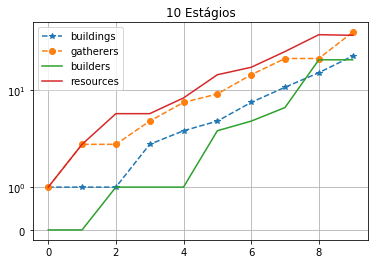

In [254]:
plt.plot(Buildings.value,'--*', label='buildings')

plt.plot(Gatherers.value,'o--', label='gatherers')
plt.plot(Builders.value, label='builders')
#plt.plot(Army.value, label='')
plt.plot(Resources.value, label='resources')
#plt.plot(Max_supply.value, label='')
#plt.plot(B.value, label='')
#plt.plot(G.value, label='')

plt.yscale('symlog')
plt.grid()
plt.legend()
plt.title(str(T) + ' Estágios')
plt.savefig("figure.png", bbox_inches = 'tight',
    pad_inches = 0)

In [281]:
custo_building      = 2 # buildings costs                         recurso/casinha
custo_units         = 3 # units costs                             recurso/pessoinha
supply_building     = 3 # supply per structure                    caminha/casinha
army_building       = 1 # army trained per house                   pessoinhas/casinha
building_builder    = 1 # buildings constructed per builder       casinhas/pessoinha1
production_gatherer = 2 # resources gathered per gatherer          recursos/pessoinha2

In [282]:
int_problem = cvx.Problem(F_Obj,Constraints)

In [283]:
%time int_problem.solve()

Wall time: 203 ms


82.0

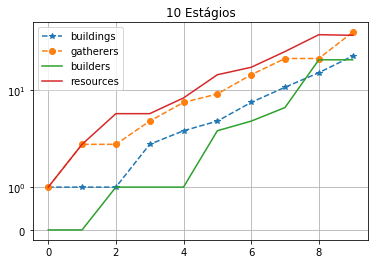

In [284]:
plt.plot(Buildings.value,'--*', label='buildings')

plt.plot(Gatherers.value,'o--', label='gatherers')
plt.plot(Builders.value, label='builders')
#plt.plot(Army.value, label='')
plt.plot(Resources.value, label='resources')
#plt.plot(Max_supply.value, label='')
#plt.plot(B.value, label='')
#plt.plot(G.value, label='')

plt.yscale('symlog')
plt.grid()
plt.legend()
plt.title(str(T) + ' Estágios')
plt.savefig("figure.png", bbox_inches = 'tight',
    pad_inches = 0)

# Podemos pensar em penalizar a quantidade de recursos flutuantes ao longo do tempo

In [14]:
F_Obj2 = cvx.Maximize(Army[-1] - cvx.norm1(Resources))

In [15]:
problem2 = cvx.Problem(F_Obj2,Constraints)

In [16]:
%time problem2.solve(solver='ECOS') #SCS #ECOS

Wall time: 142 ms


-6.999999999988266

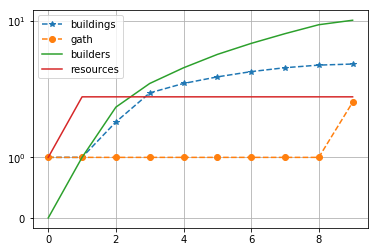

In [17]:
plt.plot(Buildings.value,'--*', label='buildings')

plt.plot(Gatherers.value,'o--', label='gath')
plt.plot(Builders.value, label='builders')
#plt.plot(Army.value, label='')
plt.plot(Resources.value, label='resources')
#plt.plot(Max_supply.value, label='')
#plt.plot(B.value, label='')
#plt.plot(G.value, label='')

plt.yscale('symlog')
plt.grid()
plt.legend();

In [18]:
Army.value

matrix([[ 1.        ],
        [ 2.        ],
        [ 2.82985361],
        [ 3.65190556],
        [ 4.6945136 ],
        [ 5.90114649],
        [ 7.18539113],
        [ 8.59790699],
        [10.18007237],
        [12.        ]])

In [20]:
F_Obj3 = cvx.Maximize(Army[-1] - cvx.norm2(Resources))
problem3 = cvx.Problem(F_Obj3,Constraints)

In [21]:
%time problem3.solve(solver='ECOS') #SCS #ECOS

Wall time: 150 ms


15.397476770905984

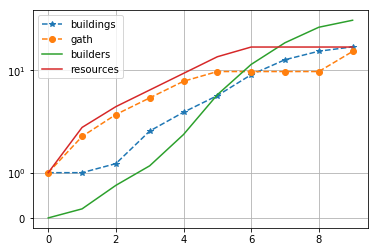

In [22]:
plt.plot(Buildings.value,'--*', label='buildings')

plt.plot(Gatherers.value,'o--', label='gath')
plt.plot(Builders.value, label='builders')
#plt.plot(Army.value, label='')
plt.plot(Resources.value, label='resources')
#plt.plot(Max_supply.value, label='')
#plt.plot(B.value, label='')
#plt.plot(G.value, label='')

plt.yscale('symlog')
plt.grid()
plt.legend();

In [23]:
Army.value

matrix([[ 1.        ],
        [ 2.        ],
        [ 3.6       ],
        [ 5.76      ],
        [ 9.216     ],
        [14.7456    ],
        [21.57656691],
        [31.6128801 ],
        [43.66292576],
        [58.53170789]])